In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


Matplotlib created a temporary cache directory at /tmp/matplotlib-yhs25nu7 because the default path (/home/i322993/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
from tagnn_yoochoose import tagnn
from model import trans_to_cuda
from analysis_utils import select_significant_vertices, filter_json_data, load_and_fix_json_files, show_histogram, chunk_data, filter_chunked_data, session_to_positions, session_to_values

16191


/Ziob/wsniady/TAGNN_explainer/TAGNN/tagnn_yoochoose.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  tagnn.load_state_dict(torch.load(filename_tagnn_model))


In [3]:
directory = "./explanation_files_long_training_rerun"
json_data = load_and_fix_json_files(directory, exclude_latest_file=True)
data_modify_global_embedding_False = filter_json_data(json_data, **{"modify_global_embedding": False})
data_modify_global_embedding_True = filter_json_data(json_data, **{"modify_global_embedding": True})
data_modify_global_embedding_False_chunked = chunk_data(data_modify_global_embedding_False)
data_modify_global_embedding_True_chunked = chunk_data(data_modify_global_embedding_True)

Fixing malformed JSON: explanation_b9186_s11.json
Fixing malformed JSON: explanation_b518_s8.json
Fixing malformed JSON: explanation_b9186_s0.json
Fixing malformed JSON: explanation_b5646_s5.json
Fixing malformed JSON: explanation_b518_s4.json
Fixing malformed JSON: explanation_b9186_s10.json
Fixing malformed JSON: explanation_b9186_s1.json
Fixing malformed JSON: explanation_b518_s9.json
Fixing malformed JSON: explanation_b5646_s4.json
Fixing malformed JSON: explanation_b518_s5.json
Fixing malformed JSON: explanation_b9621_s10.json
Fixing malformed JSON: explanation_b5646_s7.json
Fixing malformed JSON: explanation_b9186_s2.json
Fixing malformed JSON: explanation_b518_s6.json
Fixing malformed JSON: explanation_b5646_s6.json
Fixing malformed JSON: explanation_b9186_s3.json
Fixing malformed JSON: explanation_b518_s7.json
Fixing malformed JSON: explanation_b518_s0.json
Fixing malformed JSON: explanation_b9186_s8.json
Fixing malformed JSON: explanation_b9186_s4.json
Fixing malformed JSON: e

In [4]:
indices = np.arange(tagnn.n_node)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_2d = tsne.fit_transform(tagnn.embedding.weight.detach().cpu().numpy())
index_to_point = {idx: point for idx, point in zip(indices, embeddings_2d)}

In [ ]:
def plot_explanation(explanation):
    sv = select_significant_vertices(explanation)
    if len(sv) == 0:
        return
    points = explanation["session"]
    plt.figure(figsize=(8, 6))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=5)
    target_point = index_to_point[explanation["target"]]
    plt.scatter(target_point[0], target_point[1], c='yellow', s=40, edgecolors='yellow', label=f'Target {explanation["target"]}')
    for i, vertex in enumerate(sv):
        vertex_point = index_to_point[vertex.item()]
        if i == 0:
            plt.scatter(vertex_point[0], vertex_point[1], c='green', s=40, edgecolors='green', label=f'Explanation {[int(v.item()) for v in sv]}')
        else:
            plt.scatter(vertex_point[0], vertex_point[1], c='green', s=40, edgecolors='green')

    for i in range(len(points) - 1):
        start = index_to_point[points[i]]
        end = index_to_point[points[i + 1]]
        plt.annotate("",
                    xy=end, xytext=start,
                    arrowprops=dict(arrowstyle="->", color="orange", lw=2),
                    zorder=1, label="session" )
    plt.title("t-SNE 100D to 2D")
    plt.legend()
    plt.grid(True)
    plt.show()


/tmp/ipykernel_1732564/384983337.py:28: UserWarning: Legend does not support handles for Annotation instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


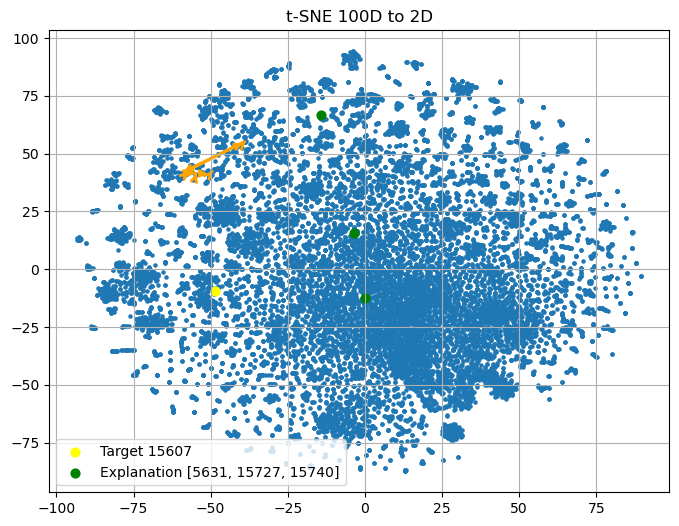

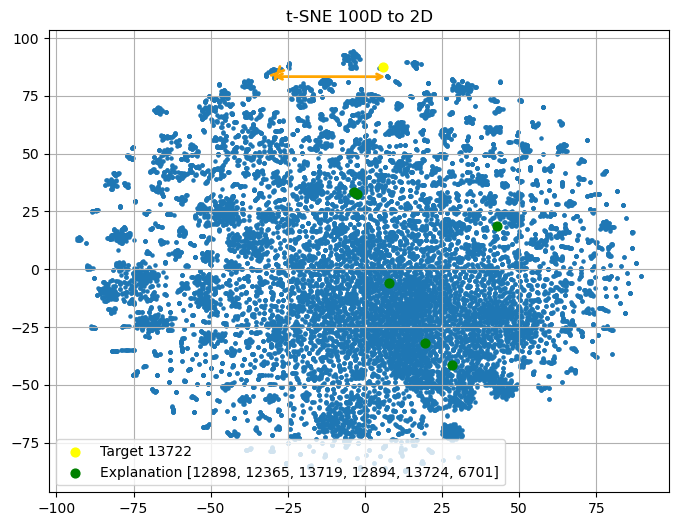

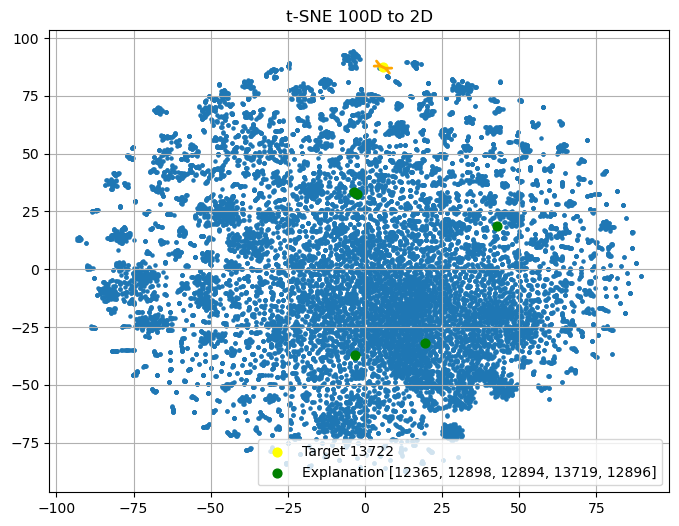

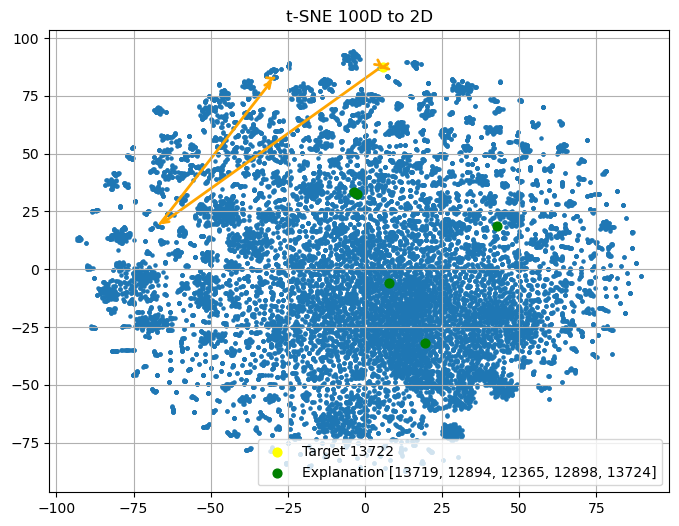

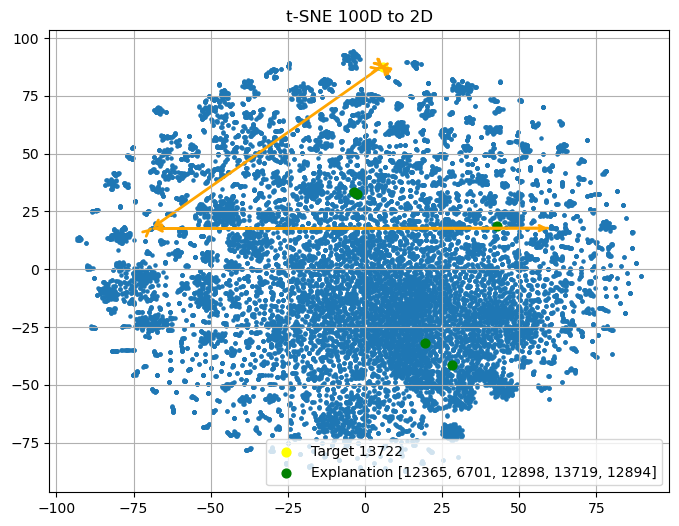

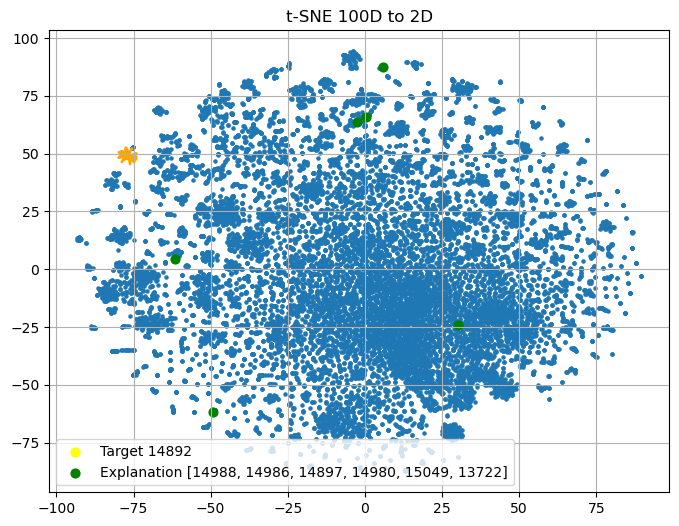

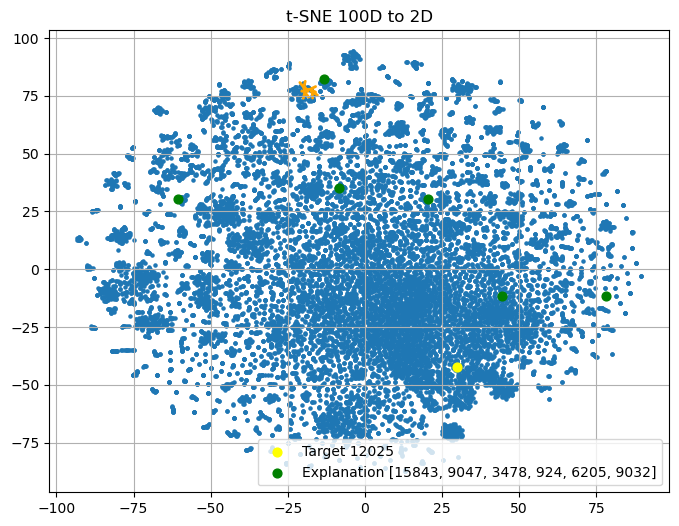

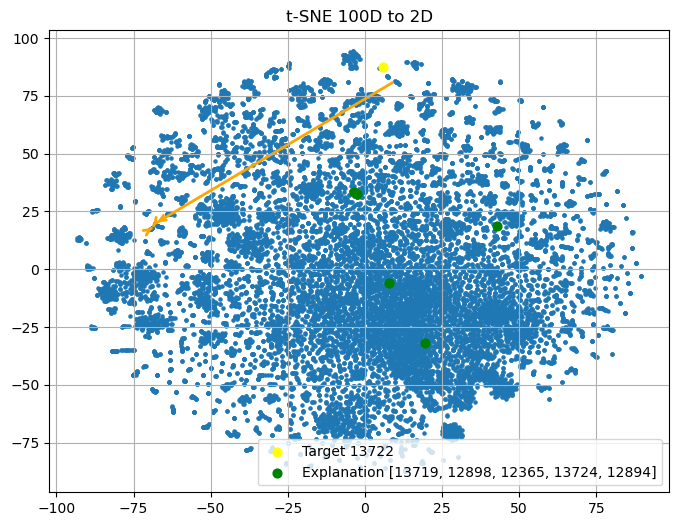

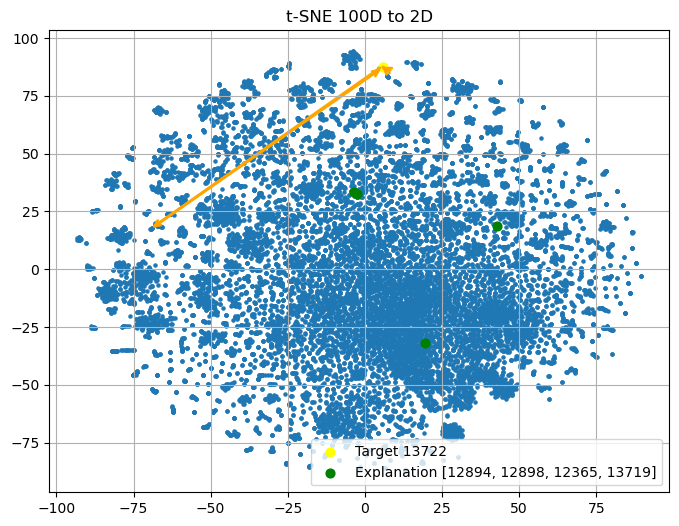

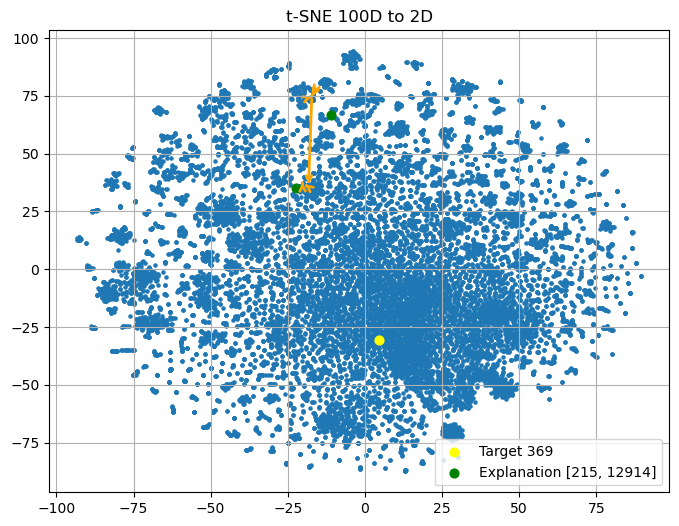

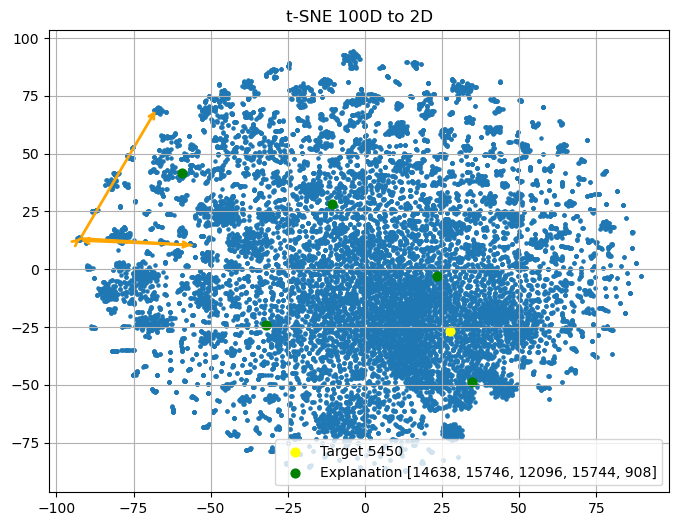

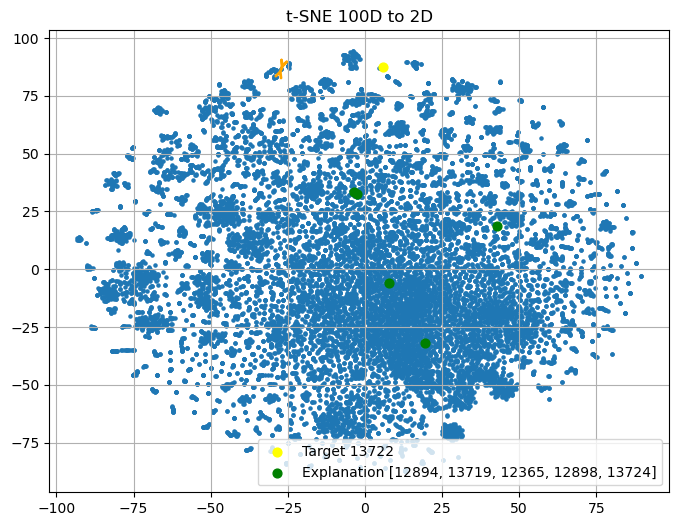

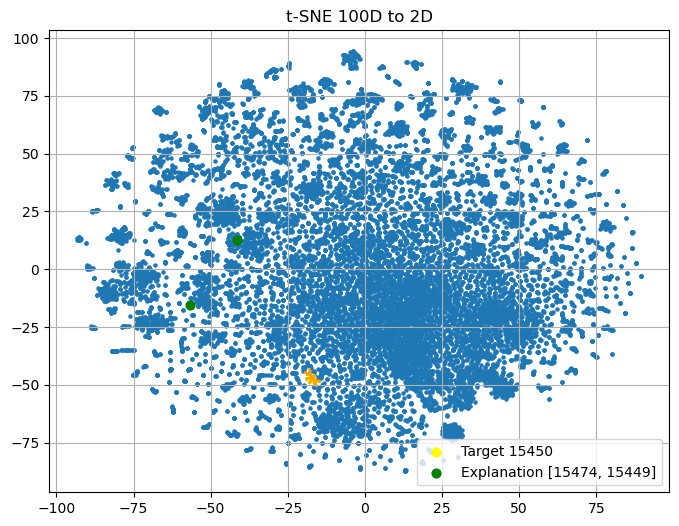

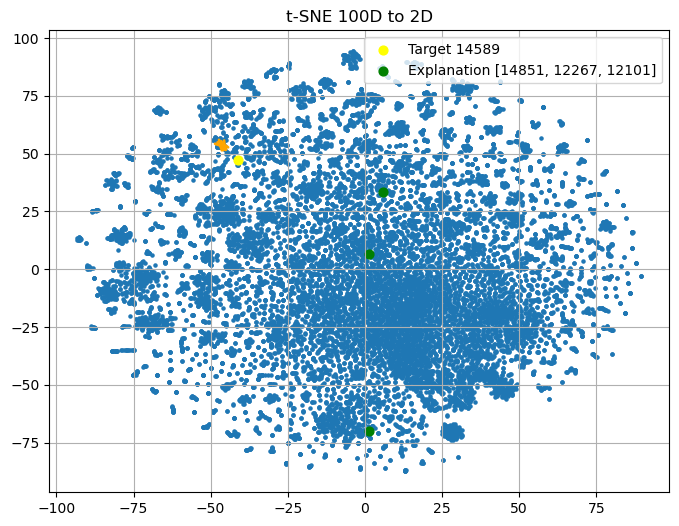

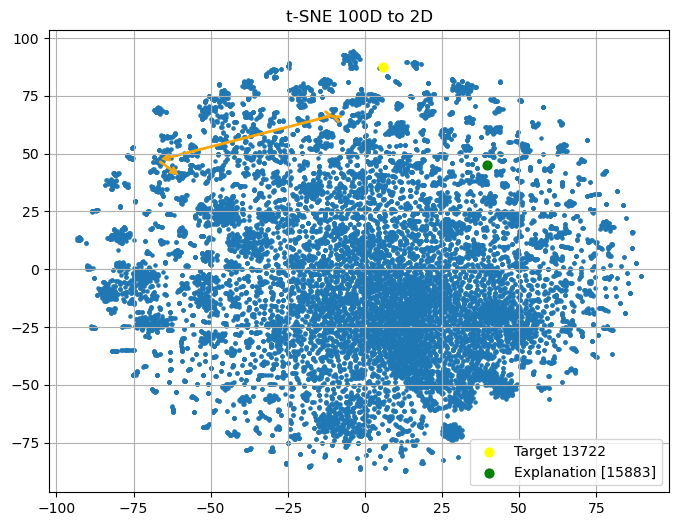

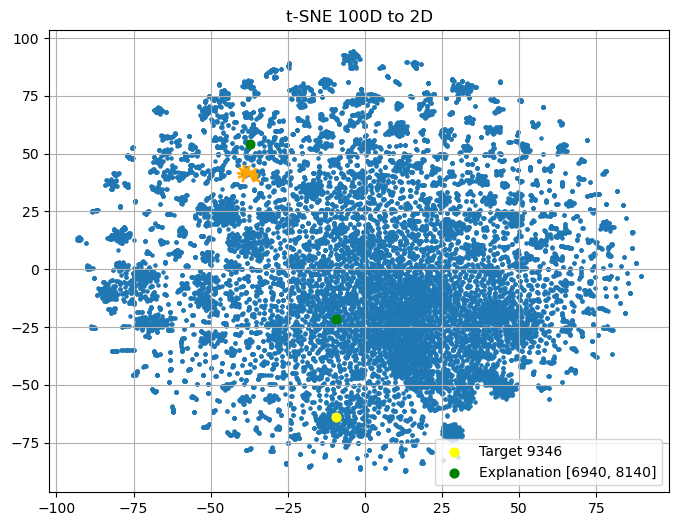

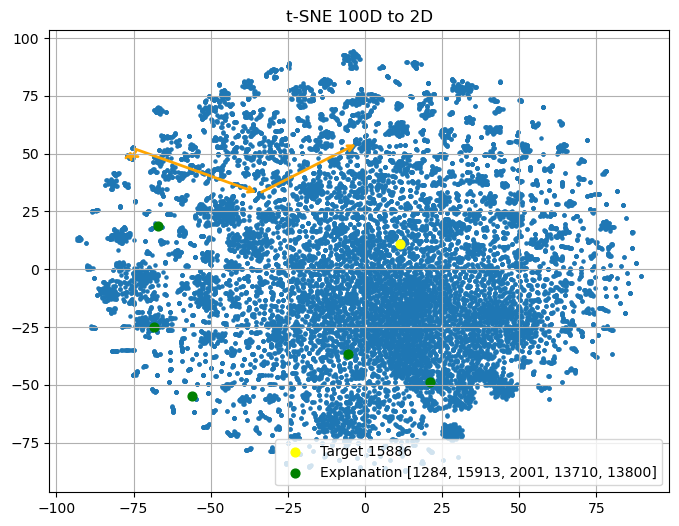

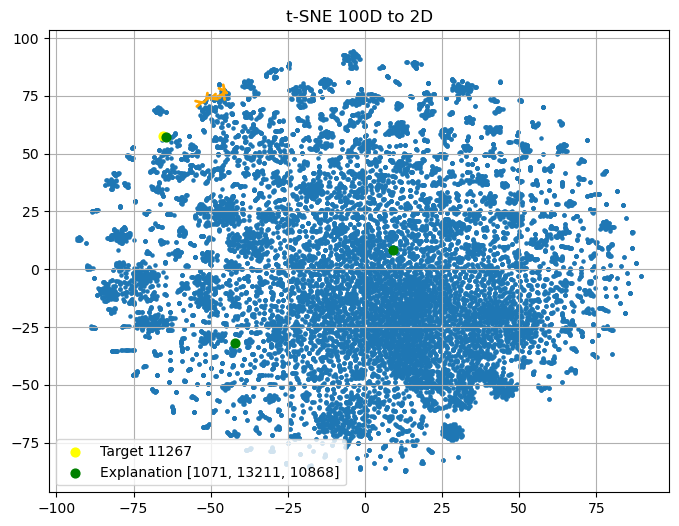

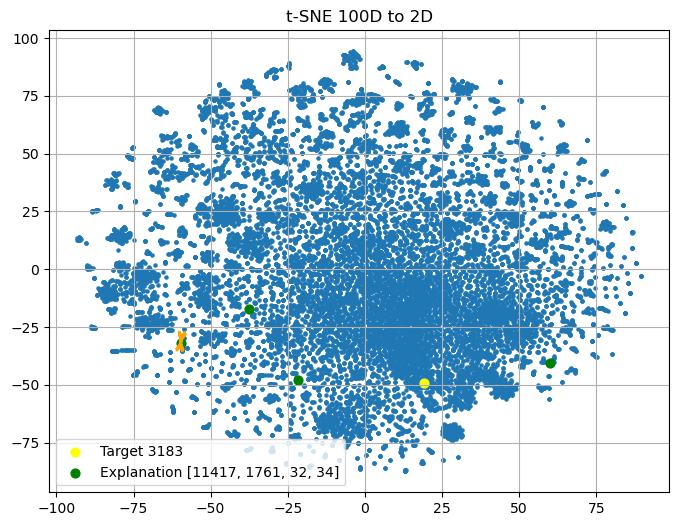

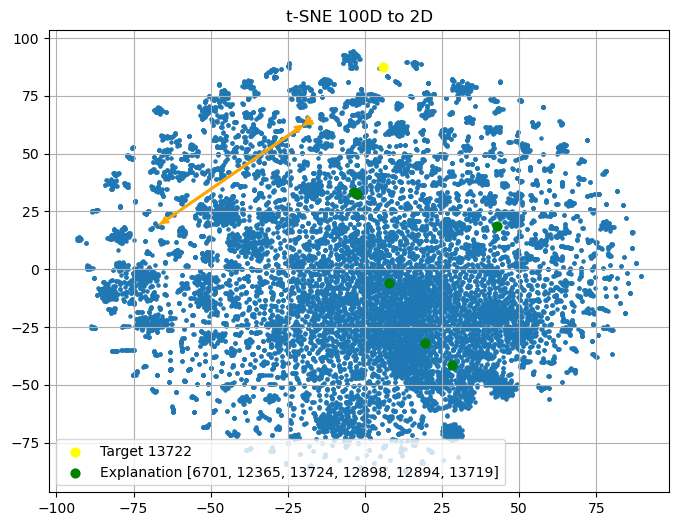

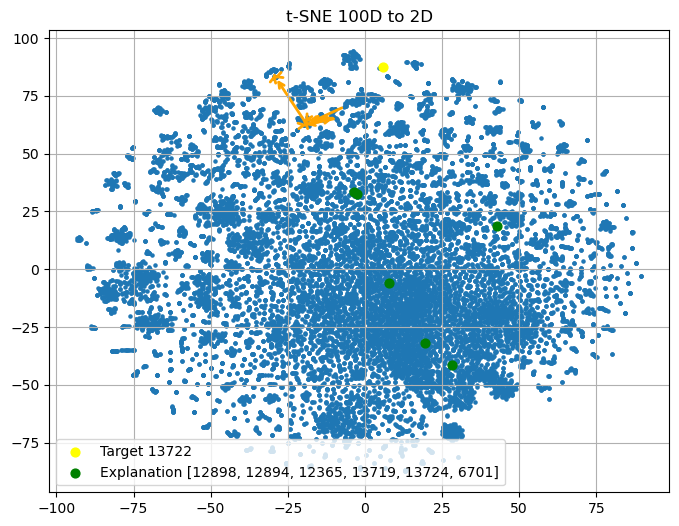

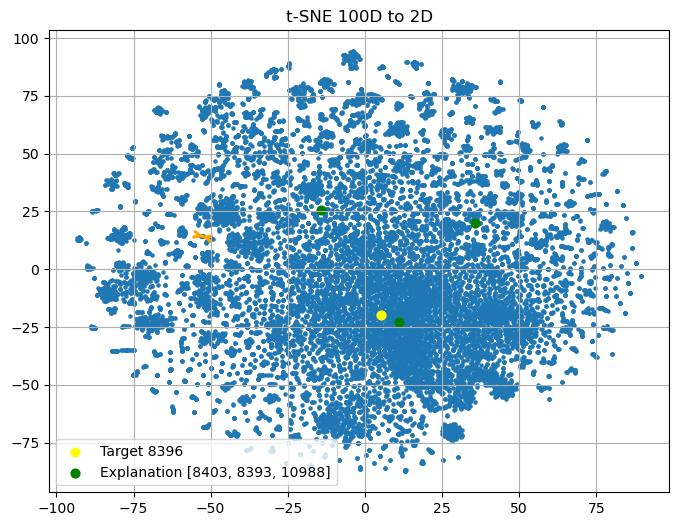

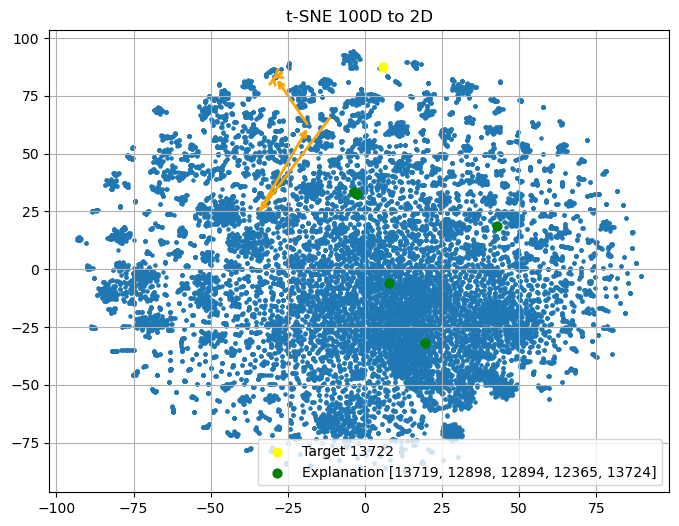

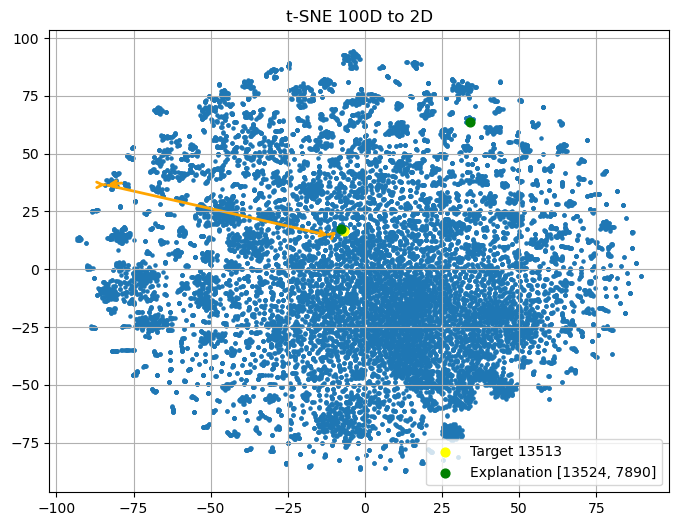

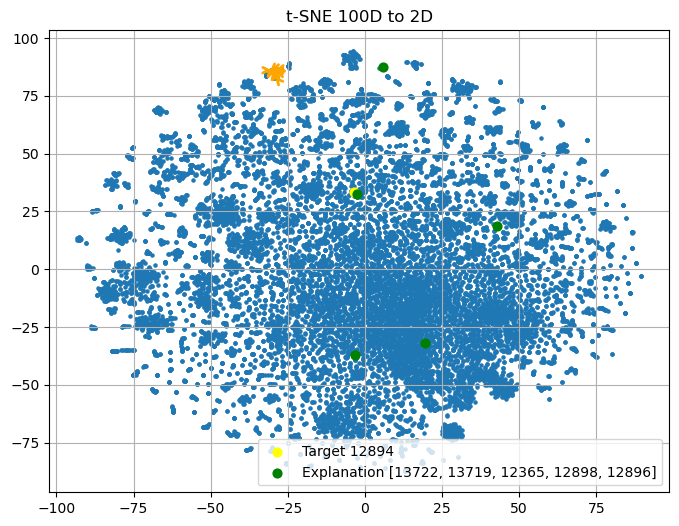

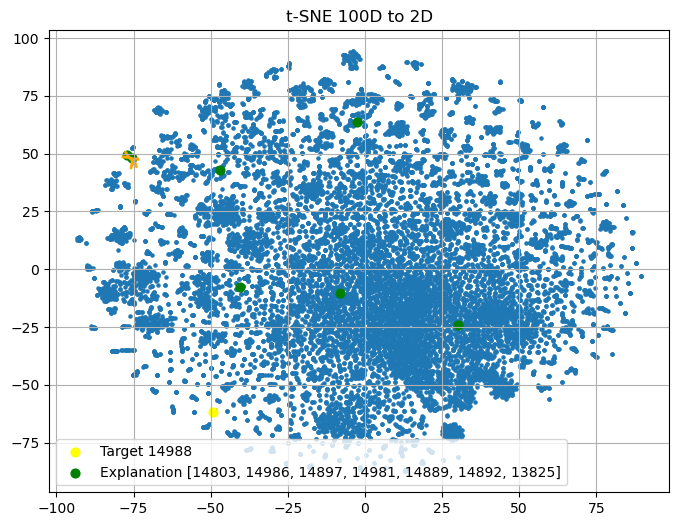

In [31]:
for i, chunk in enumerate(data_modify_global_embedding_False_chunked):
    if i == 50:
        break
    ex, _, _ = chunk
    plot_explanation(ex)